In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
# import nltk

# from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


plt.style.use('fivethirtyeight')


# **load data**

In [2]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Explor data**


In [3]:
df.shape

(53940, 10)

In [4]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
sk.show_versions()


System:
    python: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
executable: /home/big_d/PycharmProjects/PythonProjects/.venv/bin/python
   machine: Linux-6.14.0-33-generic-x86_64-with-glibc2.39

Python dependencies:
      sklearn: 1.7.1
          pip: 24.3.1
   setuptools: 80.9.0
        numpy: 1.26.4
        scipy: 1.16.1
       Cython: 3.1.3
       pandas: 2.3.1
   matplotlib: 3.10.5
       joblib: 1.5.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: /home/big_d/PycharmProjects/PythonProjects/.venv/lib/python3.12/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Zen

       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libscipy_openblas
       filepath: /home/big_d/PycharmProjects/PythonProjects/.venv/lib/python3.12/site-packages

<Axes: >

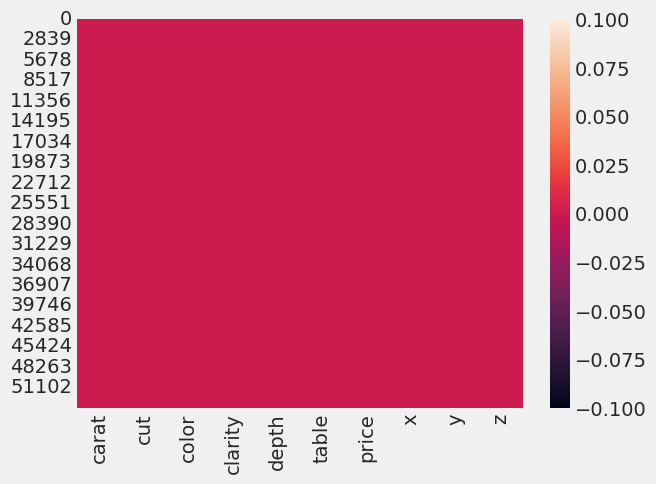

In [7]:
sns.heatmap(df.isnull())

In [8]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [9]:
df.iloc[142]

carat            0.7
cut        Very Good
color              D
clarity          VS2
depth           61.8
table           55.0
price           2767
x               5.68
y               5.72
z               3.52
Name: 142, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [11]:
pd.get_dummies('species')

,species
0,True


In [12]:
data=df.copy()

In [13]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
sk.show_versions()


System:
    python: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
executable: /home/big_d/PycharmProjects/PythonProjects/.venv/bin/python
   machine: Linux-6.14.0-33-generic-x86_64-with-glibc2.39

Python dependencies:
      sklearn: 1.7.1
          pip: 24.3.1
   setuptools: 80.9.0
        numpy: 1.26.4
        scipy: 1.16.1
       Cython: 3.1.3
       pandas: 2.3.1
   matplotlib: 3.10.5
       joblib: 1.5.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: /home/big_d/PycharmProjects/PythonProjects/.venv/lib/python3.12/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Zen

       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libscipy_openblas
       filepath: /home/big_d/PycharmProjects/PythonProjects/.venv/lib/python3.12/site-packages

<Axes: >

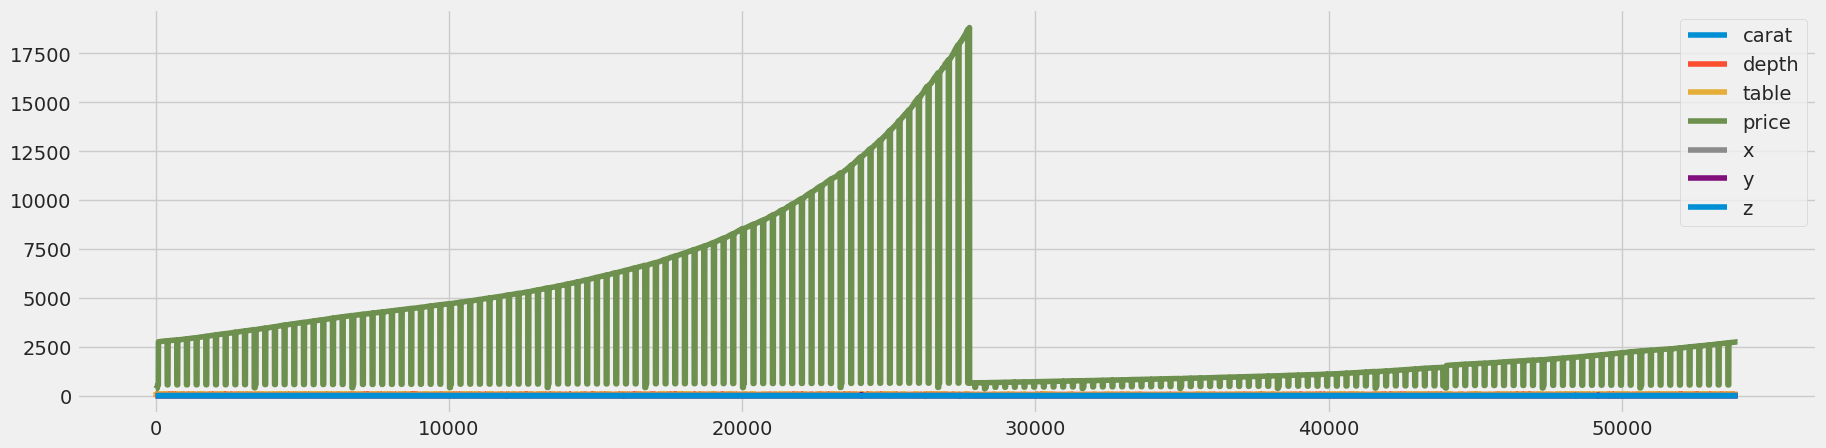

In [15]:
df.plot(figsize=(20,5))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [17]:
le = LabelEncoder()

In [18]:
for col in ['cut','color','clarity']:
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [19]:
df


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [21]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,2,3,2,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,2,3,2,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,2,3,2,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,2,3,2,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,1,1,0,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,2,0,5,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,2,2,7,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,1,2,3,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,2,2,7,61.2,56.0,2203,5.19,5.17,3.17


In [22]:
df=df.drop_duplicates()

In [23]:
df.duplicated().sum()

0

In [24]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
df['cut'].unique()          # 5
df['color'].unique()        # 7
df['clarity'].unique()      # 8

array([3, 2, 4, 5, 7, 6, 0, 1])

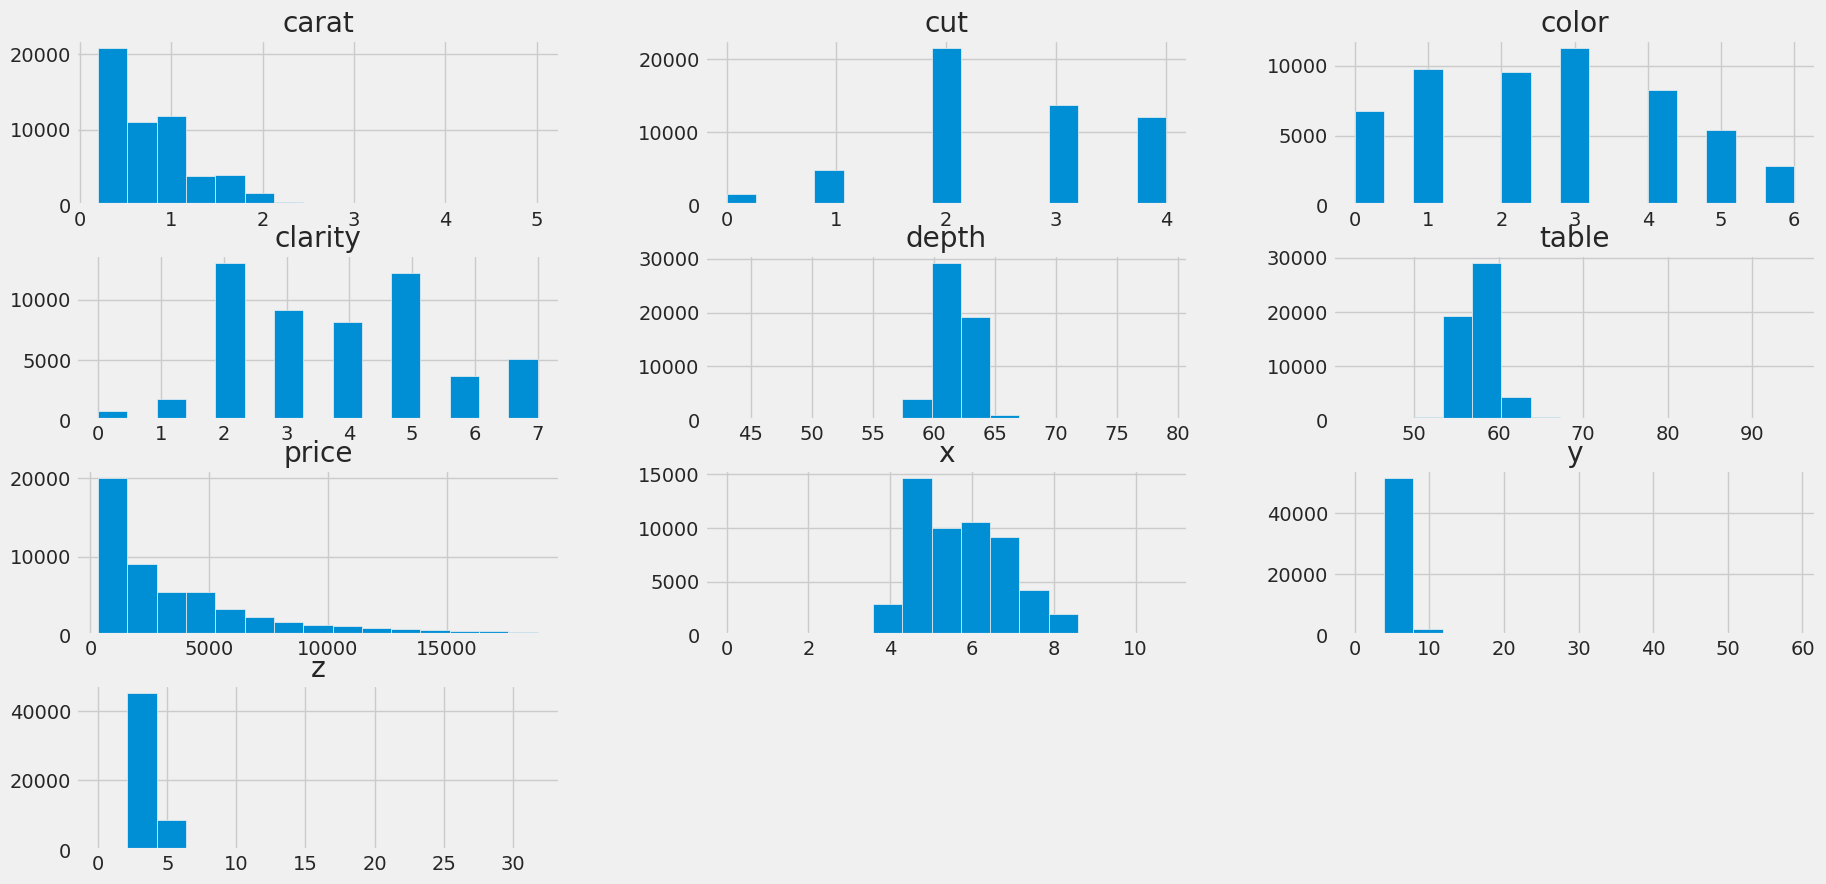

In [27]:
df.hist(figsize=(20,10),bins=15)
plt.show()

In [28]:
df['clarity'].value_counts()

clarity
2    13032
5    12229
3     9150
4     8156
7     5056
6     3647
1     1784
0      740
Name: count, dtype: int64

In [29]:
data['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [30]:
cor=df.corr()

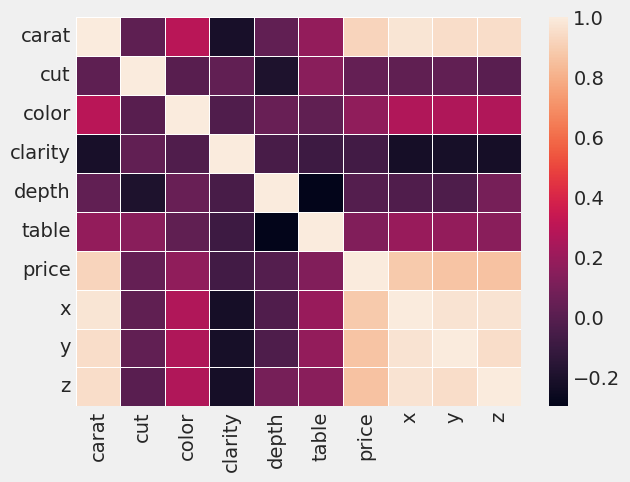

In [31]:
sns.heatmap(cor,linewidths=.5)
plt.show()

In [32]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


## **Model**

In [33]:
x = df.drop('price',axis=1)
y = df['price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)# ولا حد يعرف ليه 42

In [36]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [37]:
from sklearn.svm._libsvm import predict


def model(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2=r2_score(y_test, pre)
    return r2
    rmse= np.sqrt(mean_squared_error(y_test,pre))
    score= model.score(x_test,y_test)
    print(score)

In [38]:
li=LinearRegression()


In [39]:
model(li)

0.8869892348179879

In [40]:
De= DecisionTreeRegressor()

In [41]:
model(De)

0.9670441021428601

In [42]:
Ra=RandomForestRegressor()

In [43]:
model(Ra)

0.9824254493961637

In [44]:
Gr=GradientBoostingRegressor()

In [45]:
model(Gr)

0.9726984681552258